# Naive Bayes


Tutorial is based on 

1. GENERATIVE AND DISCRIMINATIVE CLASSIFIERS: NAIVE BAYES AND LOGISTIC REGRESSION by Tom M. Mitchell

2. [CORNELL CS4780 "Machine Learning for Intelligent Systems"](https://www.youtube.com/watch?v=VDK0nkjFh5U&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=9) by Killian Weinberger.

# Learning Problem

## Setup $\mathcal D = \{(x_i,y_i) \}_{i=1} ^n \; \text{ s.t. } \; \mathcal D \sim \mathbb P(\mathcal X , \mathcal Y)$


## Desining Learning Algorithm based on Bayes Rule

### 1. Bayes Rule: $$\mathbb P(\mathcal Y = x | \mathcal X = x) = \frac{\mathbb P(\mathcal X = x | \mathcal Y = y)  \mathbb P(\mathcal Y = y)  }{\mathbb P(\mathcal X = x)}$$
In short:
### $$ \mathbb p \left(y|x\right) = \frac{ \mathbb p \left( x | y\right) \mathbb p \left(y\right)}{ \mathbb p \left(x\right)}$$

### $$ \mathbb p \left(y|x\right) = \frac{ \mathbb p \left( x | y\right) \mathbb p \left(y\right)}{ \sum_j \mathbb P (x | y_j ) \mathbb P(y_j)}$$



## Unbiased Learning of Bayes Classifiers is Impractical


1. A maximum likelihood estimate of $\mathbb P(\mathcal Y)$ can be estimated within a few percent of its correct value provided that $\mathcal Y$ is a boolean variable (Why?
See Chapter 5 of edition 1 of Machine Learning.Tom M. Mitchell)

2. Estimating $\mathbb P( \mathcal X \mid \mathcal Y)$ is impractical. Here is why



### $$ \Theta_{ij} = \mathbb{P}(x_i | y_j)$$


1. $ x \in \mathcal X$, $x_i$ denotes the i.th feature of $x$.
2. $ y \in \mathcal y$, $y_j$ denotes the j.th possible value.


For any particular __label__, there are $2^d$ number of unique $x$, where $d$ stands for the number of features describing $x$. 





### Let's assume that a label can take on only 2 unique values (e.g. $\{ 1,0 \}$), we need to estimate $2(2^d -1)$ parameters as each unique $x$ can have two different labels.

### Quote: Worse yet, to obtain reliable estimates of each of these parameters, we will need to observe each of these distinct instances multiple times! For example, __if x is a vector containing 30 boolean features, then we will need to estimate more than 3 billion parameters.__ 


# Naive Bayes $$\text{From } 2(2^d -1) \; \text{ to } 2d $$

## Conditional independence $$\mathbb P (x_1, \dots, x_d \mid y) = \prod_{i=1} ^d \mathbb P( x_i \mid y) $$


### 1. $$ \mathbb P \left(y|x\right) = \frac{ \mathbb P \left( x | y\right) \mathbb P \left(y\right)}{ \mathbb P \left(x\right)}$$



### 2. $$ \mathbb p \left(y|x\right) = \frac{\prod^{d}_{i=1} \mathbb P \left( x_i | y\right) \mathbb P \left(y\right)}{ \mathbb P \left(x\right)}$$
__The conditional independence assumpion is applied__

## Naive Bayes on Discrete-Valued Inputs


From $\mathcal D$, we can estimate

$$ \hat{\mathbb P}(\mathcal X = x) = \frac{\sum_i I(x_i=x)}{n}$$


$$ \hat{\mathbb P}(\mathcal X = x , \mathcal Y = y) = \frac{\sum_i I(x_i=x \wedge y_i= y)}{n}$$


$$ \hat{\mathbb P}(\mathcal Y = x | \mathcal X = x) = \frac{\hat{\mathbb P}(\mathcal X = x , \mathcal Y = y)}{\hat{\mathbb P}(\mathcal X = x)}=\frac{\sum_i I(x_i=x \wedge y_i= y)}{\sum_i I(x_i=x)}$$


When the input attributes $X_i$ can take on $J$ possible discrete values, and $Y$ is a discrete variable taking on $K$ possible values, learning problem is to estimate

### 1.  $$ \Theta_{ijk} \equiv \mathbb P (x_{ij} \mid y_j)$$


$x_{ij}$ denotes i.th feature of $x$ takes j.th value $y$ can take on $K$ possible values. Hence, __we have $dJK$ parameters__. Only $n(J-1)K$ params are independent given that they must satisfiy $1 =\sum_j \Theta_{ijk}$ for each pair of i,k.

### 2. $$ \pi_k = \mathbb P (Y=y_k)$$



We can estimate these parameters using either maximum likelihood estimates
(based on calculating the relative frequencies of the different events in the data),
or using Bayesian MAP estimates (augmenting this observed data with prior dis-
tributions over the values of these parameters)



### 3. Maximum Likelihood Estimate (MLE)


### $$ \hat \Theta_{ijk} = \hat{\mathbb{P}} (X_i = x_{ij} \mid Y=y_k) = \frac{ \mid \{X_i = x_{ij} \wedge Y=y_k \} \mid }{  \mid\{ Y=y_k\} \mid }$$


### 4. Smooted MLE $$ \hat \Theta_{ijk} = \hat{\mathbb{P}} (X_i = x_{ij} \mid Y=y_k) = \frac{ \mid \{X_i = x_{ij} \wedge Y=y_k \} \mid I }{  \mid\{ Y=y_k\} \mid + IJ }$$


$$ \hat{\pi}_k = \hat{\mathbb{P}}(Y=y_k) = \frac{\mid \{Y=y_k \}\mid}{ \mid D \mid}$$

$$ \hat{\pi}_k = \hat{\mathbb{P}}(Y=y_k) = \frac{\mid \{Y=y_k \}\mid + l}{ \mid D \mid + lK}$$

$J$ is hte number of distinct values $X_i$ can take on and $l$ determines the strength of this smoothing.


# Naive Bayes (MLE) Implementation

The above problem is actually a naive Bayes problem with Bernoulli distributed features

what is the lael of  x=[H, H, T, H ] is Red or Blue

In [1]:
import pandas as pd
import numpy as np
import io
game="""game penny nickel dime quarter hat
1 T H T T Red
2 T T H T Blue
3 T H T H Blue
4 H H H T Red
5 H H T T Red
6 T T H H Blue
7 H H T T Red
8 T T H T Blue
9 T H H T Blue
10 H H H T Red
11 T T H T Blue
12 T H H T Red
13 H H T T Red
14 T T H H Blue
15 T H H T Blue
16 T T H H Blue
17 H T H H Red
18 H T H T Blue"""
df = pd.read_table(io.StringIO(game),sep=' ',index_col=0)
df

,penny,nickel,dime,quarter,hat
game,,,,,
1,T,H,T,T,Red
2,T,T,H,T,Blue
3,T,H,T,H,Blue
4,H,H,H,T,Red
5,H,H,T,T,Red
6,T,T,H,H,Blue
7,H,H,T,T,Red
8,T,T,H,T,Blue
9,T,H,H,T,Blue


# Estimating probabilities



### 1. $$ \mathbb P (y=RED | \vec x =[Penny=H,Nickel=H,Dime=T,Quarter=H ]) = \frac{\mathbb P (\vec x | y)} {\mathbb P (\vec x )} $$



### 2. Compute Probabilities $$\hat{\theta}_{i,j,k} = \frac{\sum_{i = 1}^{18}I(y_i = c)I(x_{ia} = j)}{\sum_{i=1}^{18}I(y_i = c)}$$
### $$\hat{\theta}_{penny,H,R} = \frac{3}{4} = 0.75 \; \text{ and } \; \hat{\theta}_{penny, H,B} = \frac{1}{10} = 0.1 $$

### $$ \hat{\theta}_{nickel,H,R} = \frac{7}{8} = 0.875 \; \text{ and } \; \hat{\theta}_{nickel,H,B} = \frac{3}{10} = 0.3$$

### $$\hat{\theta}_{dime,T,R} = \frac{1}{2} = 0.5 \; \text{ and } \; \hat{\theta}_{dime,T,B} = \frac{1}{10} = 0.1 $$

### $$\hat{\theta}_{quarter,H,R} = \frac{1}{8} = 0.125  \; \text{ and } \; \hat{\theta}_{quarter,H,B} = \frac{4}{10} = 0.4$$

In [2]:
# x=[H,H,T,H]
penny_h_given_red=sum(df[df.penny=='H'].hat=='Red')/sum(df.hat=='Red')
print('P(penny=H | hat=Red)',penny_h_given_red)
nickel_h_given_red=sum(df[df.nickel=='H'].hat=='Red')/sum(df.hat=='Red')
print('P(nickel=H | hat=Red)',nickel_h_given_red)
dime_t_given_red=sum(df[df.dime=='T'].hat=='Red')/sum(df.hat=='Red')
print('P(dime=T | hat=Red)',dime_t_given_red)
quarter_h_given_red=sum(df[df.quarter=='H'].hat=='Red')/sum(df.hat=='Red')
print('P(quarter=H | hat=Red)',quarter_h_given_red)

P(penny=H | hat=Red) 0.75
P(nickel=H | hat=Red) 0.875
P(dime=T | hat=Red) 0.5
P(quarter=H | hat=Red) 0.125


In [3]:
nominator=penny_h_given_red * nickel_h_given_red * dime_t_given_red * quarter_h_given_red

penny_h_given_blue=sum(df[df.penny=='H'].hat=='Blue')/sum(df.hat=='Blue')
print('P(penny=H | hat=Blue)',penny_h_given_blue)

nickel_h_given_blue=sum(df[df.nickel=='H'].hat=='Blue')/sum(df.hat=='Blue')
print('P(nickel=H | Hat=Blue)',nickel_h_given_blue)

dime_t_given_blue=sum(df[df.dime=='T'].hat=='Blue')/sum(df.hat=='Blue')
print('P(dime=T | Hat=Blue)',dime_t_given_blue)

quarter_h_given_blue=sum(df[df.quarter=='H'].hat=='Blue')/sum(df.hat=='Blue')
print('P(quarter=H | hat=Blue)',quarter_h_given_blue)

P(penny=H | hat=Blue) 0.1
P(nickel=H | Hat=Blue) 0.3
P(dime=T | Hat=Blue) 0.1
P(quarter=H | hat=Blue) 0.4



###  2. $$ \mathbb P \left(y|x\right) = \frac{\prod^{d}_{i=1} \mathbb P \left( x_i | y\right) \mathbb P \left(y\right)}{ \mathbb P \left(x\right)}$$


### 3. $$ \mathbb P \left(y|x\right) =  \frac{\prod_{i = 1}^{d} \hat{\theta}_{ijR} \; \mathbb P(y = R)}{\prod_{i = 1}^ d \hat{\theta}_{ijR} \; \mathbb P(y=R) + \prod_{i = 1}^d  \hat{\theta}_{ijB} \; \mathbb P(y=B)}$$

__where__

### $$ \hat \Theta_{ijk} = \hat{\mathbb{P}} (X_i = x_{ij} \mid Y=y_k) = \frac{ \mid \{X_i = x_{ij} \wedge Y=y_k \} \mid }{  \mid\{ Y=y_k\} \mid }$$

### 4. Remove constats $$ \mathbb P \left(y|x\right) =  \frac{\prod_{i = 1}^{d} \hat{\theta}_{ijR}}{\prod_{i = 1}^ d \hat{\theta}_{ijR} \;  + \prod_{i = 1}^d  \hat{\theta}_{ijB} }$$

## 5. Putting (2) in (4) $$\frac{4375}{4503} = 0.972$$

In [4]:
denominator= nominator +(penny_h_given_blue*nickel_h_given_blue*dime_t_given_blue*quarter_h_given_blue)
prob_red_given_h_h_t_h=nominator/denominator
print('P(HAT=Red | penny=H,nickel=H,dime=T,quarter=H  )=',prob_red_given_h_h_t_h)

P(HAT=Red | penny=H,nickel=H,dime=T,quarter=H  )= 0.9715745058849656


# Naive Bayes in OOP fashion

In [5]:
class NaiveBayes:
    def __init__(self):
        self.conditional_probs=dict()
        self.class_probs=dict()
        
    def fit(self,df):
        # Number of points and dimensions
        self.features=list(df.columns[:-1])
        self.label_name=df.columns[-1]
        self.unique_labels=df[self.label_name].unique()
        # Compute class probabilities
        for c in self.unique_labels:
            self.class_probs[c]=(df[self.label_name]==c).mean()
        # Dimensions
        for x_a in self.features:
            # Unique Values in a dimension
            for j in df[x_a].unique():
                # Prob of unique value given label
                for c in self.unique_labels:
                    # P(x_a = j | y) = P(x_a = j, y) / P(y)
                    prob=sum(df[df[x_a]==j][self.label_name]==c)/sum(df[self.label_name]==c)
                    self.conditional_probs[x_a+'_'+j+'_'+self.label_name+'_'+c]=prob

    def predict_proba(self,x):
        results={}
        probs={}
        for c in self.unique_labels:
            probs_given_c=1
            for x_a, j in zip(self.features,x):            
                probs_given_c*=self.conditional_probs[x_a+'_'+j+'_'+self.label_name+'_'+c]
            probs[c]=probs_given_c
        
        for c in self.unique_labels:
            nominator=probs[c]
            denominator=0
            for cc in self.unique_labels:
                if c == cc:
                    continue
                denominator+=probs[cc]
            results[c]=nominator/(nominator+denominator)
        return results

In [6]:
h=NaiveBayes()
h.fit(df)
h.predict_proba(['H','H','T','H'])

{'Red': 0.9715745058849656, 'Blue': 0.028425494115034425}

In [7]:
print(h.predict_proba(['T','T','T','T']))
print(h.predict_proba(['T','T','T','H']))
print(h.predict_proba(['T','T','H','H']))
print(h.predict_proba(['T','H','H','H']))

{'Red': 0.2656183595410115, 'Blue': 0.7343816404589886}
{'Red': 0.07193002647024974, 'Blue': 0.9280699735297503}
{'Red': 0.008538134724935451, 'Blue': 0.9914618652750645}
{'Red': 0.12331238197243438, 'Blue': 0.8766876180275656}


# Naive Bayes with Continues Features


## $$ \mathbb P \left(y|x\right) = \frac{\prod^{d}_{i=1} \mathbb P \left(\left[x\right]_{i} \mid y\right) \mathbb P \left(y\right)}{ \mathbb P \left(x\right)}$$
with:
## $$ \mathbb P \left(\left[x\right]_{i} \mid y\right) = \mathcal{N}\left(\left[\mu_y\right]_{i}, \left[\sigma\right]_{i}\right)$$

That is, there is a separate mean value for each feature $\left[x\right]_{i}$ and each class $y \in \{0, 1\}$. However, variances are shared across classes, so that there is only one variance $\left[\sigma\right]_{i}$ per feature.


# Naive Bayes $$ \mathbb P \left(y|x\right) = \frac{\prod^{d}_{i=1} \mathbb P \left( x_i \mid y\right) \mathbb P \left(y\right)}{ \mathbb P \left(x\right)}$$
__Conditional independence assumpion__ on (1)

with:
### $$ \mathbb P (x_i | y ) = \mathcal{N} (\mu_{y,i}, \sigma_i)$$


### 1. $$ \mathbb P (y =1 |x) = \frac{\prod^{d}_{i=1} \mathbb P ( x_i \mid y=1) \mathbb P (y=1)}{ \mathbb P (x)}$$

#### 2. $$ \mathbb P (y =1 |x) = \frac{\prod^{d}_{i=1} \mathbb P ( x_i \mid y=1) \mathbb p (y=1)}{ \prod^{d}_{i=1} \mathbb P ( x_i | y=1) \mathbb P (y=1) + \prod^{d}_{i=1} \mathbb P ( x_i \mid y=0) \mathbb P (y=0)}$$

### 5. $$ \mathbb P (y =1 \mid x) = \frac{1}{1 + \frac{\prod^{d}_{\alpha=1} \mathbb P ( x_i \mid y=0) \mathbb P (y=0)}{\prod^{d}_{i=1} \mathbb P ( x_i \mid y=1) \mathbb P (y=1)}}$$

Because $$\frac{A}{A+B} = \frac{1}{1 + \frac{B}{A}}$$


### 6. $$ \mathbb P (y =1 \mid x) = \frac{1}{1 + exp\Big(log\big( \frac{\prod^{d}_{i=1} \mathbb p ( x_i \mid y=0) \mathbb P (y=0)}{\prod^{d}_{i=1} \mathbb P ( x_i \mid y=1) \mathbb P (y=1)}\big)\Big)}$$

1. $exp(ln(x))=x $


### 7. $$ \frac{1}{1+ exp \Big (-log \mathbb P (y = 1) + log\mathbb P (y=0) - log\prod^{d}_{i=1} \mathbb P ( x_i \mid y=1)+ log \prod^{d}_{i=1} \mathbb P ( x_i \mid y = 0) \Big )}$$

1. Apply the quotient rule $ ln(x/y)=ln(x)−ln(y)$
2. Product rule $ln(xy)=ln(x)+ln(y)$



### 8. $$ \frac{1}{1+ exp \Big (log \Big( \frac{\mathbb P (y=0)}{\mathbb P (y=1)} \Big) + \sum^{d}_{i=1} log\big( \frac{\mathbb P ( x_i | y=0)}{\mathbb P ( x_i | y=1)} \Big) \Big) }$$


Group the terms . Distribute log
1. Apply the quotient rule $ ln(x/y)=ln(x)−ln(y)$
2. Apply $ln(\prod)=\sum$
3. $log(x^1)=-1 log(x)$
4. $log(\frac{a}{b})=-1 log(\frac{b}{a})$



### 9. Plug the model assumption into the second term of the denominator
### $$ \sum^{d}_{i=1} log\Big( \frac{\frac{\exp\big( -\frac{\big(x_i-\mu_{0,i }\big)^2}{2\sigma^2}\big)}{\sqrt{2\pi \sigma^2}}}{\frac{\exp\big( -\frac{\big(x_i - \mu_{1,i }\big)^2}{2\sigma^2}\big)}{\sqrt{2\pi \sigma^2}}} \Big) $$

$\mu_0 $ and $\mu_1$ are $y=0$ and $y=1$, respectively

### 10. Cancel out constants $$ \sum^{d}_{i=1} log\Big(exp\Big( \frac{(x_i-\mu_{1,i }\big)^2 -(x_i -\mu_{0,i}\big)^2 }{2 \sigma^2}\Big)\Big) $$
$\sqrt{2\pi \sigma^2}$ in the denominators are canceled out. Note that $ \frac{exp(a)}{exp(b)} = exp(a-b)$.

### 11. $$ \sum^{d}_{i=1} \frac{(x_i - \mu_{1, i }\big)^2 -(x_i - \mu_{0, i }\big)^2 }{2 \sigma_i ^2} $$
log(exp(x))=x


### 12. Completing the square $$\sum^{d}_{i =1} \frac{(\mu_{0,i } - \mu_{1, i }) x_i } {\sigma_i ^2 } + \frac{\mu_{1,i}^2-\mu_{0,i}^2}{2 \sigma_i ^2}$$

### 13. Putting all together. $$ \mathbb P (y =1 |x) = \frac{1}{ 1+ \Big( \frac{\mathbb P (y=0)}{\mathbb P (y=1)}  + \sum^{d}_{i=1} \frac{(\mu_{0,i } - \mu_{1, i }) x_i } {\sigma_i ^2 } + \frac{\mu_{1,i}^2-\mu_{0,i}^2}{2 \sigma_i ^2}\Big)}$$

$P=\mathbb P (y =0)$ and $1-P=\mathbb P (y=1)$



### 14. $$ \mathbb p (y =1 |x) = \frac{1}{1 + exp\Big( b + w^T x \Big)}$$

### where $$ b = log\frac{1-P}{P} + \sum^{d}_{i=1} + \frac{\mu_{1,i}^2-\mu_{0,i}^2}{2 \sigma_i ^2}$$

### $$ w = \sum^{d}_{i=1} \frac{(\mu_{0,i } - \mu_{1,i }) x_i } {\sigma_i^2 }$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

[(-8.0, 8.0), (-15.0, 5.0)]

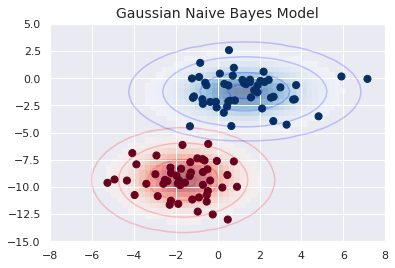

In [10]:
class GaussianNaiveBayes:
    def __init__(self):
        self.mu=dict()
        self.std=dict()
        
    def fit(self,X,y):
        unique_labels=np.unique(y)
        for c in np.unique(y):
            self.mu[c]=X[y==c].mean(axis=0)
            self.std[c]=X[y==c].std(axis=0)
    def predict_prob(self,X,label):
        return np.exp(-0.5 * (X - self.mu[label]) ** 2 / self.std[label] ** 2).prod(1)
        

h=GaussianNaiveBayes()
h.fit(X,y)

# Visualize obtained from https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Gaussian Naive Bayes Model', size=14)

# Create GRID
xlim,ylim = (-8, 8), (-15, 5)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T


for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    # Predict P(y=label|X) 
    P=h.predict_prob(Xgrid,label)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),levels=[0.01, 0.1, 0.5, 0.9],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

# Gaussian Naive Bayes and Logistic Regression

### 1. Naive bayes estimates $\mathbb P (X|Y)$ and $\mathbb P(Y)$ and obtain $\mathbb P(Y|X)$ via bayes rule
### 2. Logistic Regression estimates $\mathbb P(Y|X)$

### 3. If the GNB modeling assumptions do not hold, the asymptotic (as the number of training examples approach infinity) classification accuracy for LR is often better than the asymptotic accuracy of GNB.

### 4. GBN learns faster

"As Ng & Jordan (2002) show, GNB parameter estimates
converge toward their asymptotic values in order log n examples, where n is the dimension of X.", wherase LR requires order n examples
